# Multiple Linear Regression

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data_df = pd.read_csv("D:/AIML/kc_house_data.csv")
data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [26]:
print(data_df.shape)

(21613, 21)


In [27]:
print(data_df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [28]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
data_df =data_df[["price","date", "bedrooms", 
                    "bathrooms", "sqft_living", "floors", 
                    "waterfront", "view", "condition", "grade","zipcode"]]
data_df


,price,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode
0,221900.0,20141013T000000,3,1.00,1180,1.0,0,0,3,7,98178
1,538000.0,20141209T000000,3,2.25,2570,2.0,0,0,3,7,98125
2,180000.0,20150225T000000,2,1.00,770,1.0,0,0,3,6,98028
3,604000.0,20141209T000000,4,3.00,1960,1.0,0,0,5,7,98136
4,510000.0,20150218T000000,3,2.00,1680,1.0,0,0,3,8,98074
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,20140521T000000,3,2.50,1530,3.0,0,0,3,8,98103
21609,400000.0,20150223T000000,4,2.50,2310,2.0,0,0,3,8,98146
21610,402101.0,20140623T000000,2,0.75,1020,2.0,0,0,3,7,98144
21611,400000.0,20150116T000000,3,2.50,1600,2.0,0,0,3,8,98027


In [30]:
data_df.loc[:,"year"] = data_df["date"].str[0:4]
data_df.loc[:,"month"] =data_df["date"].str[4:6]
data_df = data_df.drop(columns=["date"])
data_df


C:\Users\Admin\AppData\Local\Temp\ipykernel_2780\3735241396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[:,"year"] = data_df["date"].str[0:4]
C:\Users\Admin\AppData\Local\Temp\ipykernel_2780\3735241396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[:,"month"] =data_df["date"].str[4:6]


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,year,month
0,221900.0,3,1.00,1180,1.0,0,0,3,7,98178,2014,10
1,538000.0,3,2.25,2570,2.0,0,0,3,7,98125,2014,12
2,180000.0,2,1.00,770,1.0,0,0,3,6,98028,2015,02
3,604000.0,4,3.00,1960,1.0,0,0,5,7,98136,2014,12
4,510000.0,3,2.00,1680,1.0,0,0,3,8,98074,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,98103,2014,05
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,98146,2015,02
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,98144,2014,06
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,98027,2015,01


# Encoding

In [31]:
cat_features = ["waterfront", "view","condition","grade","zipcode"]
data_df = pd.get_dummies(data_df,columns=cat_features)
print(data_df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'year',
       'month', 'waterfront_0', 'waterfront_1', 'view_0',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=101)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']]) 
data_normalized = scaler.transform(data_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']])# Scaled data 
data_normalized

array([[-0.86641874, -0.39873715, -1.44746357, -0.97983502, -0.915427  ],
       [-0.00594021, -0.39873715,  0.1756067 ,  0.53363434,  0.93650577],
       [-0.98047774, -1.47395936, -1.44746357, -1.42625404, -0.915427  ],
       ...,
       [-0.37588065, -1.47395936, -1.77207762, -1.15404732,  0.93650577],
       [-0.38159993, -0.39873715,  0.50022075, -0.52252773,  0.93650577],
       [-0.58576282, -1.47395936, -1.77207762, -1.15404732,  0.93650577]])

In [33]:
data_df_normalized=pd.DataFrame(data_normalized,columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])
data_df_normalized=data_df_normalized.join(data_df[data_df.columns.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])])
data_df

,price,bedrooms,bathrooms,sqft_living,floors,year,month,waterfront_0,waterfront_1,view_0,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,1.0,2014,10,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,2014,12,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,2015,02,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,2014,12,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,2015,02,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,2014,05,1,0,1,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.50,2310,2.0,2015,02,1,0,1,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020,2.0,2014,06,1,0,1,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2.0,2015,01,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Y = data_df_normalized['price']
X = data_df_normalized[data_df_normalized.columns.drop('price')]
print(X.shape)

(21613, 100)


# Train_test_split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)
X_train.shape , X_test.shape


((17290, 100), (4323, 100))

# R2

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
train_score=model.score(X_train,Y_train)
test_score=model.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)


Train Score (R-Squared):  0.8330470423997228
Test Score (R-Squared) 0.83119671091952


# RMSE

In [18]:
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5
test_predictions = model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)

Train RMSE :  0.4085959832090949
Test RMSE :  0.4108582345766831


(array([3349., 1250., 2414., 2180.,  978., 2231., 1875., 2211., 1940.,
        3185.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

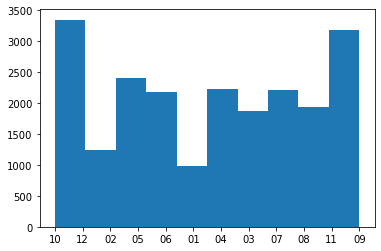

In [37]:
plt.hist(data_df['month'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2780\3183418894.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


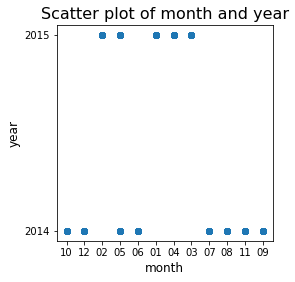

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[3,3])
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(data_df['month'],data_df['year'])
ax.set_title("Scatter plot of month and year",fontsize=16)
ax.set_ylabel('year',fontsize=12)
ax.set_xlabel('month',fontsize=12)
fig.show()